In [14]:
import sklearn
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [20]:
# 导入数据集
digits = load_digits()
x_data_all = digits.data
y_data_all  = digits.target
# 划分数据集
x_train_all, x_test, y_train_all, y_test = train_test_split(x_data_all, y_data_all, random_state=7)
# 划分验证集
x_train, x_valid, y_train, y_valid = train_test_split(
        x_train_all, y_train_all, random_state = 11
)
# 归一化
x_train = x_train.reshape(-1, 8, 8)
x_valid = x_valid.reshape(-1, 8, 8)
x_test = x_train.reshape(-1, 8, 8)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform( # fit的意思是把这个过程中所有的均值和方差记录下来。
    x_train.astype(np.float32).reshape(-1,1)).reshape(-1,8,8,1)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,8,8,1)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1,1)).reshape(-1,8,8,1)

(1010, 8, 8) (1010,)
(337, 8, 8) (337,)


In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = 3,
                             padding = 'same',
                             activation = 'relu',
                             input_shape = (8, 8, 1))) # 一行 == train_set[1:]
model.add(keras.layers.Conv2D(filters = 32, kernel_size = 3,
                             padding = 'same',
                             activation = 'relu'))
model.add(keras.layers.MaxPool2D(pool_size = 2))
model.add(keras.layers.Conv2D(filters = 64, kernel_size = 3,
                             padding = 'same',
                             activation = 'relu'))

# 在连接全连接层之前/做一个flatten
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(10, activation = "softmax"))
model.compile(loss = "sparse_categorical_crossentropy", 
             optimizer = "sgd",
             metrics = ["accuracy"])# 衡量的一个指标<各类召回率的算术平均值>

In [22]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 8, 8, 32)          320       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 38,314
Trainable params: 38,314
Non-trainable params: 0
__________________________________________________

In [24]:
# logdir = '.\cnn-callbacks'
# if not os.path.exists(logdir):
#     os.mkdir(logdir)
# output_model_file = os.path.abspath(os.path.join(logdir,"fashion_mnist_model.h5"))
# callbacks = [
#     keras.callbacks.TensorBoard(logdir),# 保留训练过程中各个参数的变化曲线，例如损失函数的变化曲线。以及保留模型结构图。
#     keras.callbacks.ModelCheckpoint(output_model_file,
#                                    save_best_only = True) #设置保留模型。保留最佳模型
# ]
history = model.fit(x_train_scaled, y_train, epochs=100,
            validation_data=(x_valid_scaled, y_valid))

Train on 1010 samples, validate on 337 samples
Epoch 1/100
1010/1010 [==============================] - 0s 134us/sample - loss: 0.4001 - accuracy: 0.9010 - val_loss: 0.4046 - val_accuracy: 0.8813
Epoch 2/100
1010/1010 [==============================] - 0s 131us/sample - loss: 0.3556 - accuracy: 0.8990 - val_loss: 0.3274 - val_accuracy: 0.8991
Epoch 3/100
1010/1010 [==============================] - 0s 130us/sample - loss: 0.3038 - accuracy: 0.9257 - val_loss: 0.3016 - val_accuracy: 0.9139
Epoch 4/100
1010/1010 [==============================] - 0s 222us/sample - loss: 0.2830 - accuracy: 0.9257 - val_loss: 0.2723 - val_accuracy: 0.9228
Epoch 5/100
1010/1010 [==============================] - 0s 131us/sample - loss: 0.2427 - accuracy: 0.9376 - val_loss: 0.2385 - val_accuracy: 0.9258
Epoch 6/100
1010/1010 [==============================] - 0s 128us/sample - loss: 0.2257 - accuracy: 0.9327 - val_loss: 0.2331 - val_accuracy: 0.9258
Epoch 7/100
1010/1010 [==============================] - 0s

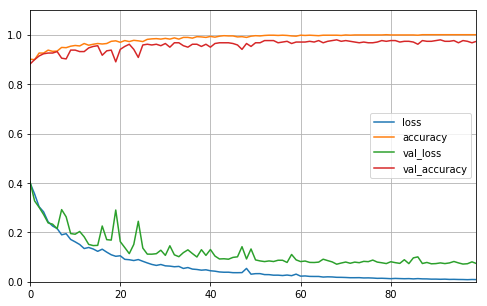

In [28]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True) 
    plt.gca().set_ylim(0, 1.1) 
    plt.show()
plot_learning_curves(history)